### Problem Statement
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

### Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Importing Visualising Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import scikitplot as skplt

#Importing DataCleaning Libraries
from sklearn.preprocessing import  PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from collections import Counter

#Importing Classification Models 
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#Importing Classification Model Evaluation Metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

#Importing Hyperparameter Tuning model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Importing Serialization libraries
import joblib

### Loading Dataset

In [4]:
wine = pd.read_csv("winequality-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine.shape

(1599, 12)

### About Dataset : Our dataset consists of 1359 records and 12 fields.

### Exploratory Data Analysis

In [7]:
#Retrieving dataset information to analyze datatype of features and label and also checking null values if any

wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


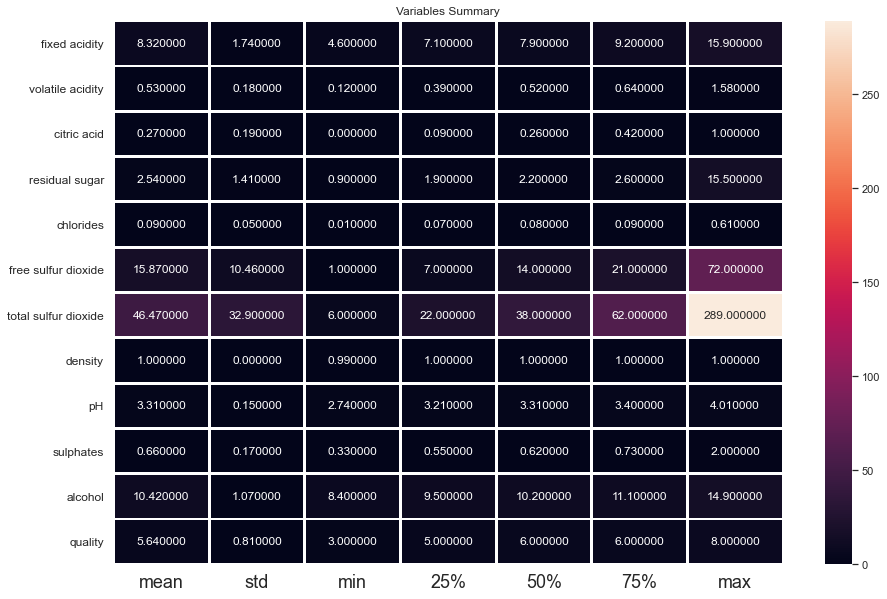

In [8]:
#visualizing statistical description of dataset
plt.figure(figsize = (15,10))
sns.heatmap(round(wine.describe()[1:].transpose(),2),linewidth = 2,annot= True, fmt = "f")
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 12)
plt.title("Variables Summary")
plt.show()

In [9]:
#Statistical Analysis of Dataset
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- fixed acidity:
    - mean = 8.319
    - max = 15.900
    - min = 4.600


- volatile acidity:
    - mean = 0.527
    - max = 1.580
    - min = 0.120
    
    
- citric acid:
    - mean = 0.270
    - max = 1.000
    - min = 0.000
    
    
- residual sugar:
    - mean = 2.538
    - max = 15.500
    - min = 0.900
    
    
- chlorides:
    - mean = 0.087
    - max = 0.611
    - min = 0.012
    
    
- free sulfur dioxide:
    - mean = 15.874
    - max = 72.000
    - min = 1.000
    
    
- total sulfur dioxide:
    - mean = 46.467
    - max = 289.000
    - min = 6.000
    
    
- density:
    - mean = 0.996
    - max = 1.003
    - min = 0.990
    
    
- pH:
    - mean = 3.311
    - max = 4.010
    - min = 2.740
    
    
- sulphates:
    - mean = 0.658
    - max = 2.000
    - min = 0.330
    
    
- alcohol:
    - mean = 10.422
    - max = 14.900
    - min = 8.4000
    
    
- quality:
    - mean = 5.636
    - max = 8.000
    - min = 3.000
    
    
    
    

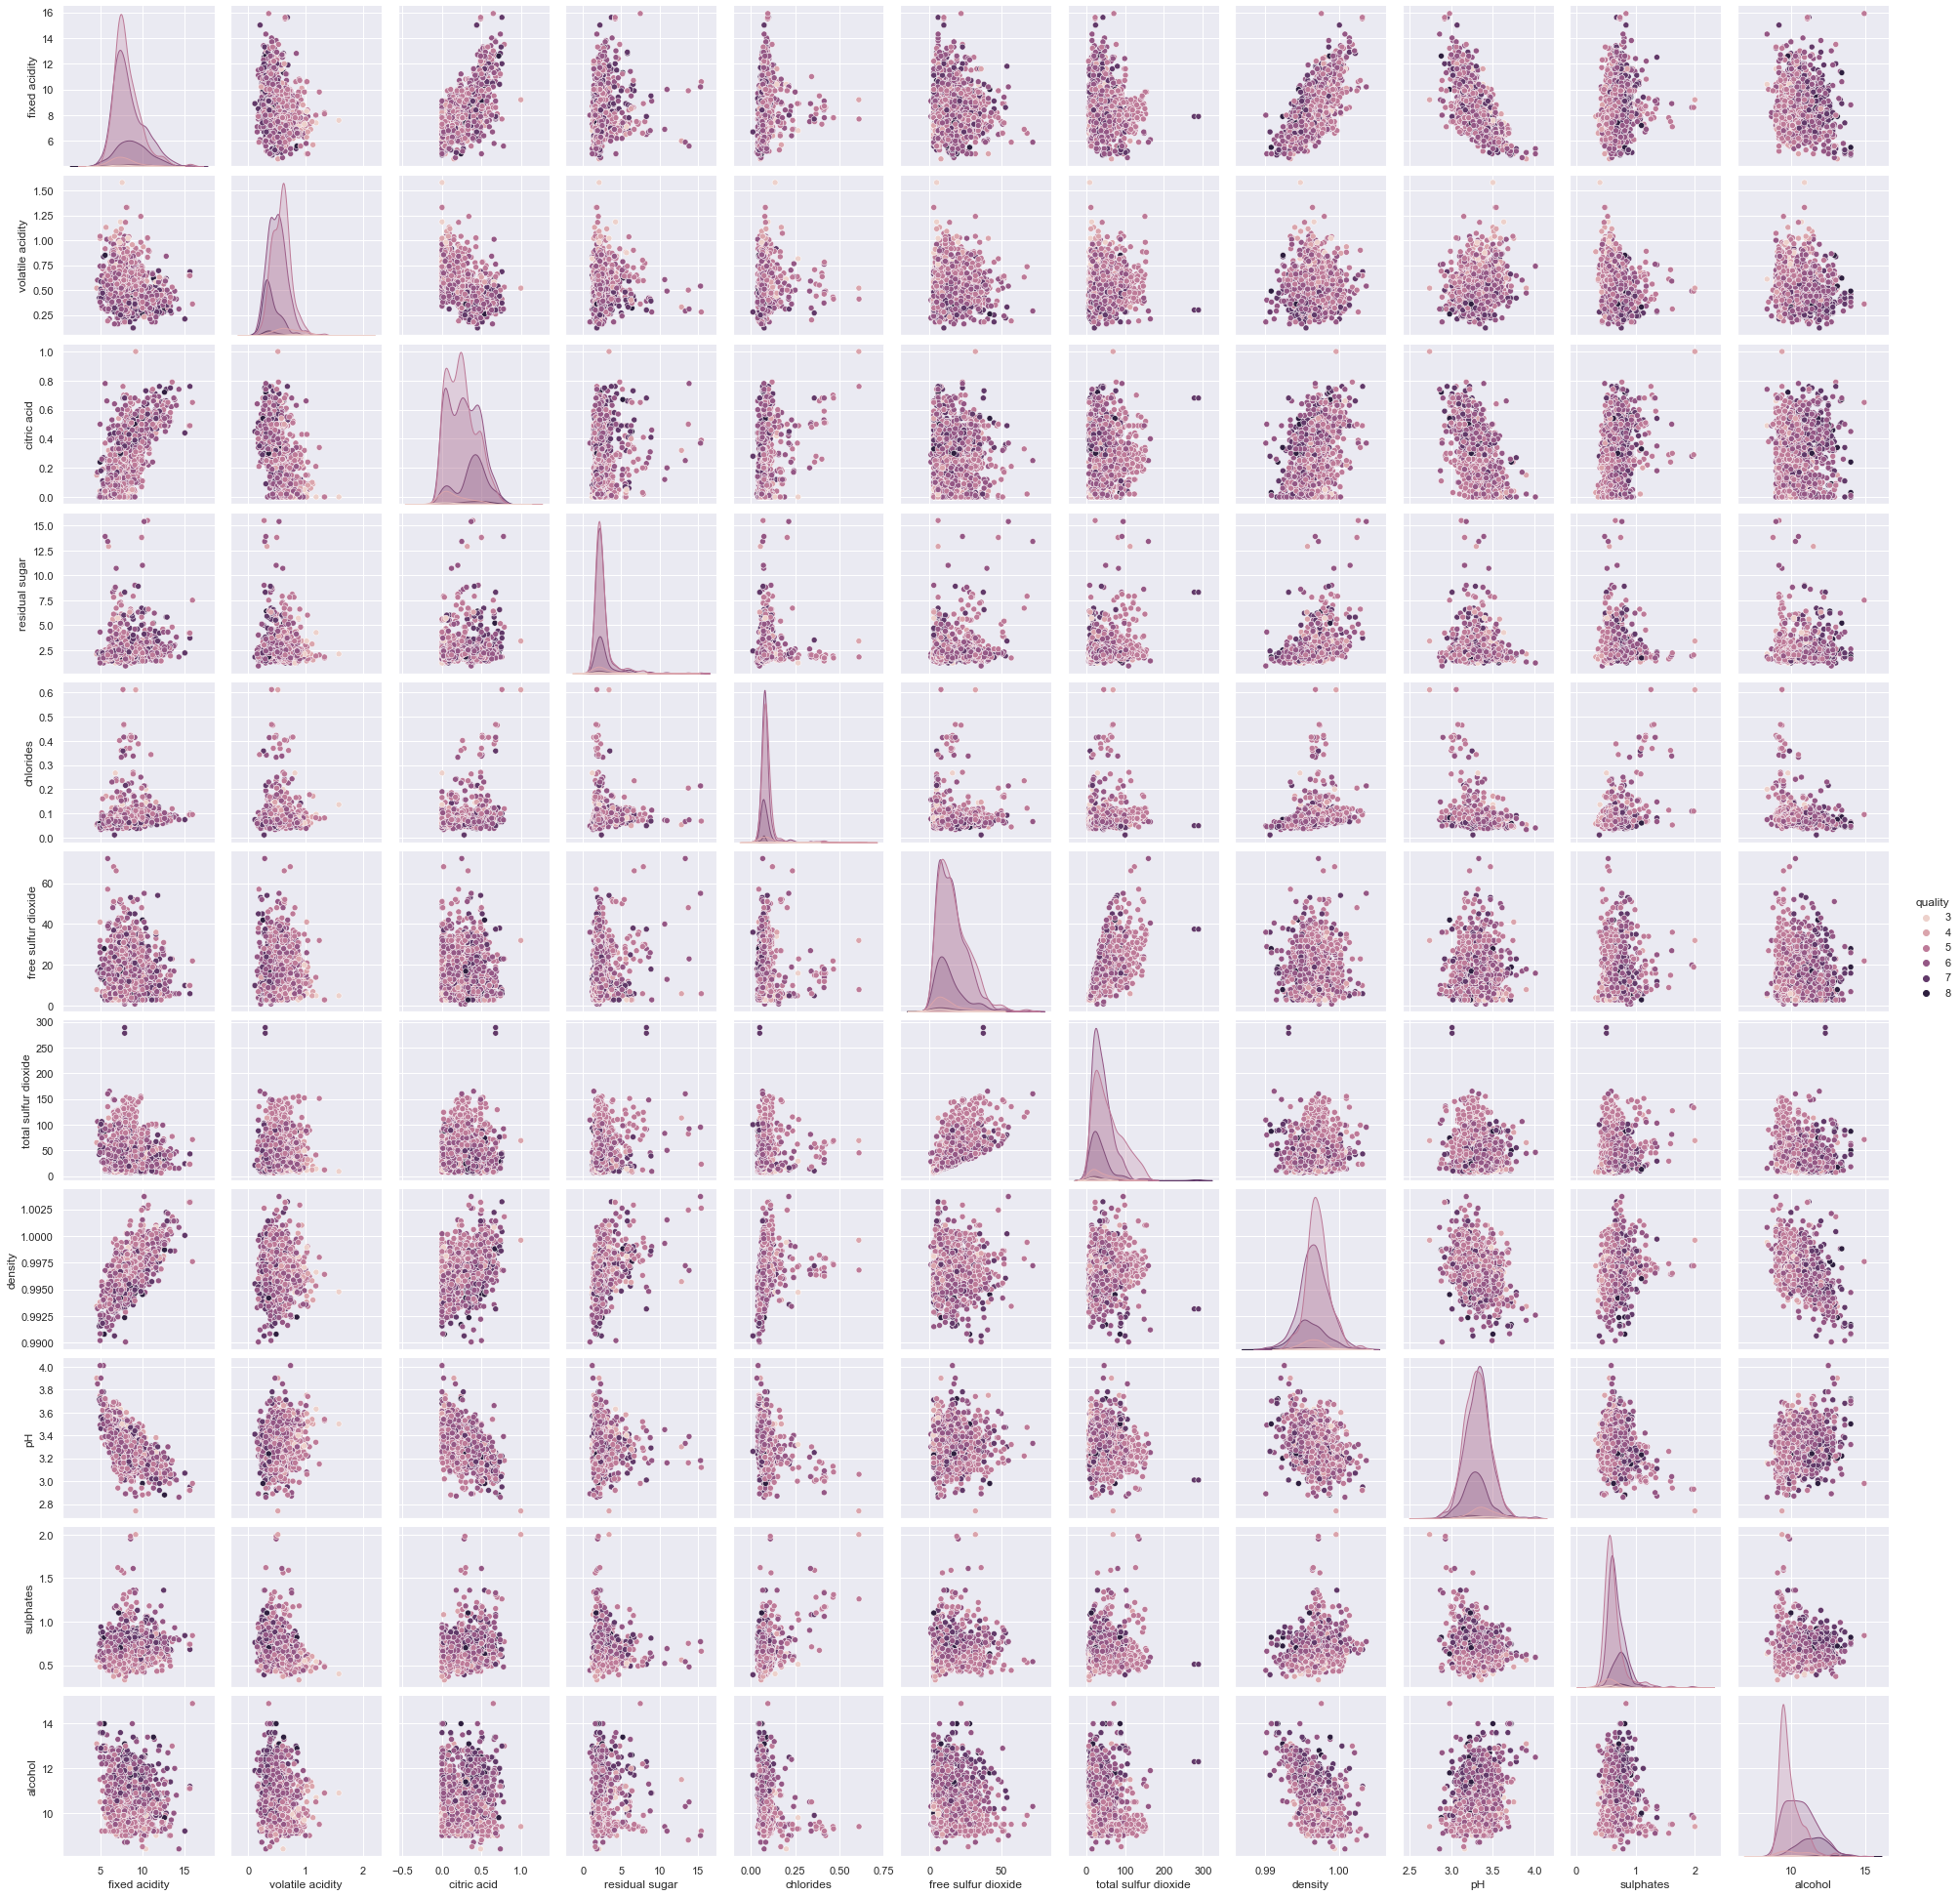

In [10]:
#Multivariate Analysis
#Plotting pairplot to get data distribution and relationship of features within features and features with label
sns.pairplot(wine, hue = 'quality')

### Conclusion:
- Data is normally distributed althought their is skewness present.
- No multicollinearity problem.

In [11]:
#Anaysing Correlation among features and label 

wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


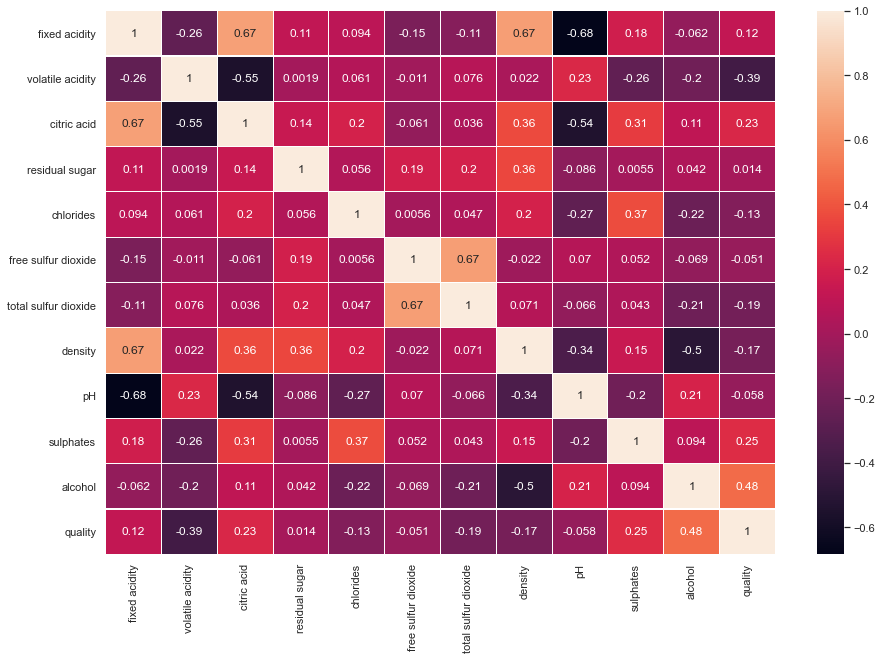

In [12]:
#Multivariate Analysis
#Visualizing Correlation among features and label 

plt.figure(figsize = (15,10))
sns.heatmap(wine.corr(), annot = True, fmt = '.2g', linewidth = .1)
plt.show()

No multicollinearity problem. Features are independent.

In [13]:
#Checking for null values

wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
#Checking for duplicate values
wine.duplicated().sum()

240

In [15]:
#Storing duplicate records 
duplicate = wine[wine.duplicated()]

In [16]:
#All the duplicate records
duplicate 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [17]:
#Dropping duplicates
wine.drop_duplicates(inplace = True)
wine.duplicated().sum()

0

### Data Cleaning

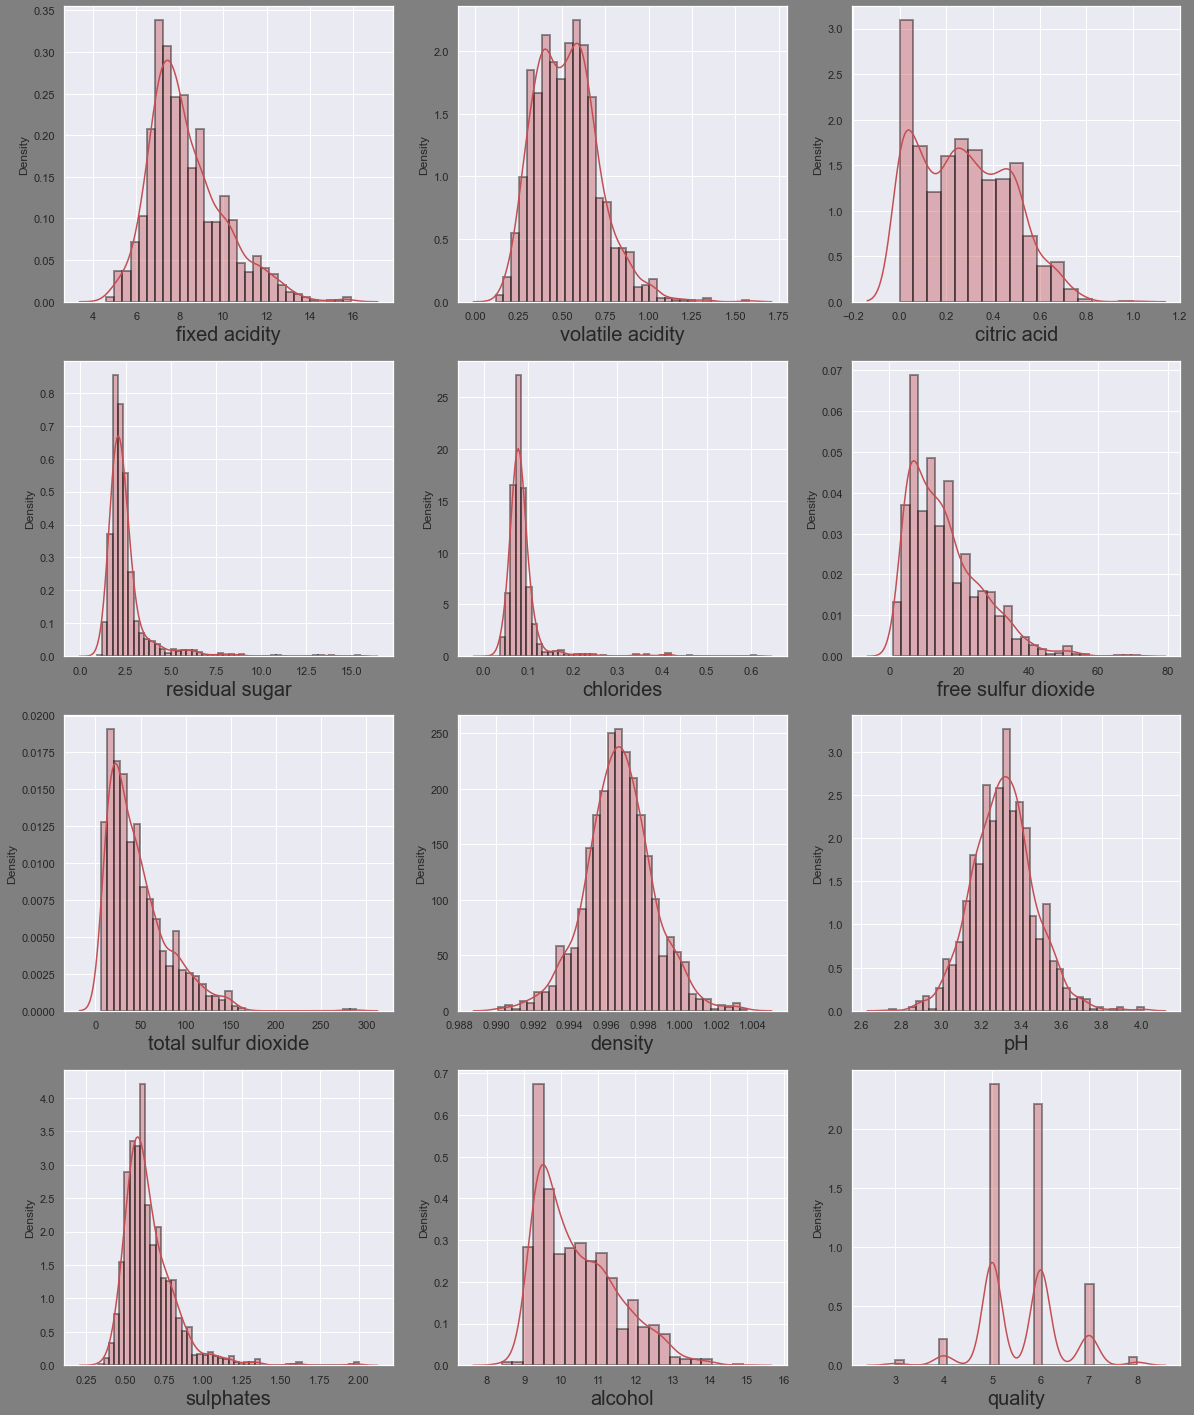

In [18]:
#MultiVariate Analysis
#how data is distributed
plt.figure(figsize = (20,25), facecolor ='grey')
plotnumber=1

for column in wine:
    if plotnumber<=12: #there are 9 columns in dataset
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(wine[column], color = 'r',
                    hist_kws=dict(edgecolor="black", linewidth=2))
        plt.xlabel(column,fontsize=20)
        #plt.ylabel(Outcome,fontsize=20)
    plotnumber+=1
plt.show()  

There is skewness present in following columns : fixed acidity ,volatile acidity,residual sugar ,chlorides,free sulfur dioxide, total sulfur dioxide, sulphates and alcohol.

In [19]:
#checking skewness of dataset
wine.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 0.192407
dtype: float64

If skewness is higher than 0.5 and lower than -0.5 then data needs to be cleaned. we have highly skewed features

- fixed acidity 0.941041
- volatile acidity 0.729279
- residual sugar 4.548153
- chlorides 5.502487
- free sulfur dioxide 1.226579
- total sulfur dioxide 1.540368
- sulphates 2.406505
- alcohol 0.859841
- quality 2.133662

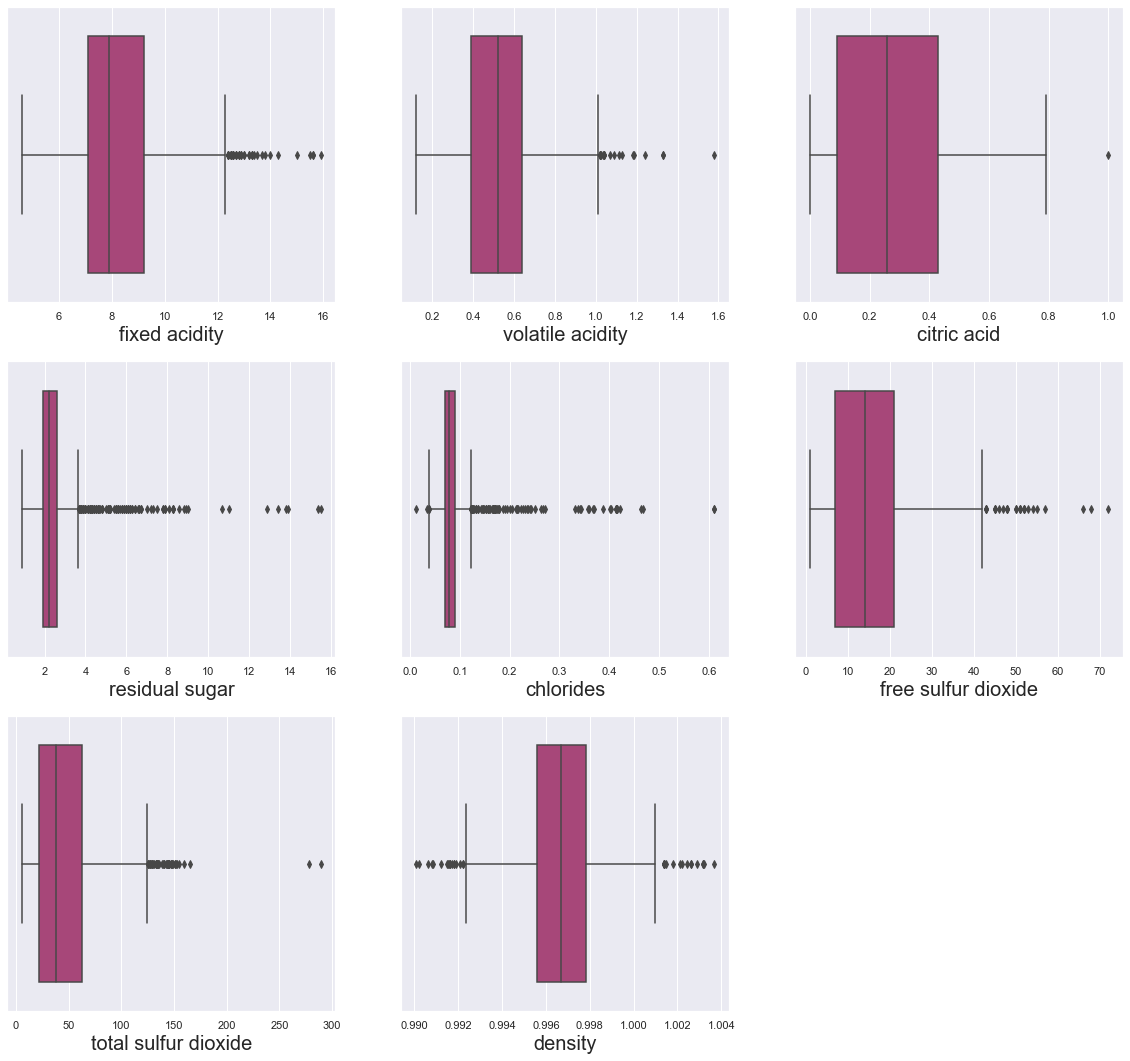

In [20]:
#Visualizing outliers using boxplot
plt.figure(figsize = (20,25), facecolor ='white')
plotnumber=1

for column in wine:
    if plotnumber<9: #there are 9 columns in dataset
        ax = plt.subplot(4,3,plotnumber)
        sns.boxplot(wine[column], palette = 'magma')
        plt.xlabel(column,fontsize=20)
        #plt.ylabel(Outcome,fontsize=20)
    plotnumber+=1
plt.show()    

In [21]:
#Splitting Dataset into target and features
X = wine.iloc[:,:-1]
y = wine.iloc[:,-1]

In [22]:
#Our dataset in not strictly positive that's why we are using Yeo-Johnson power transformation to remove skewness
pt = PowerTransformer(method='yeo-johnson')
X_trans = pd.DataFrame(pt.fit_transform(X), columns = X.columns)
X_trans.skew()

fixed acidity           0.001884
volatile acidity        0.008311
citric acid             0.016563
residual sugar         -0.001715
chlorides              -0.061923
free sulfur dioxide    -0.009899
total sulfur dioxide   -0.003897
density                -0.002812
pH                     -0.005007
sulphates               0.014637
alcohol                 0.116742
dtype: float64

In [23]:
X_trans

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.439412,0.978091,-1.530544,-0.602600,-0.166676,-0.269573,-0.128948,0.587781,1.277041,-0.582775,-1.068157
1,-0.161475,1.720040,-1.530544,0.560720,0.778512,0.992495,0.841796,0.054350,-0.695907,0.400130,-0.499290
2,-0.161475,1.242047,-1.256962,0.153076,0.557116,0.192377,0.530012,0.161294,-0.296058,0.188379,-0.499290
3,1.529010,-1.551503,1.389613,-0.602600,-0.219369,0.384096,0.681966,0.694083,-0.967619,-0.391438,-0.499290
4,-0.439412,0.791661,-1.530544,-0.844564,-0.219369,-0.023152,0.100926,0.587781,1.277041,-0.582775,-1.068157
...,...,...,...,...,...,...,...,...,...,...,...
1354,-0.903672,0.596149,-0.996743,-0.602600,-0.616834,1.176074,0.028175,-0.100946,0.727244,1.169880,-0.916248
1355,-1.436385,0.494776,-0.996743,-0.384706,0.477791,1.395040,0.236575,-0.968055,0.912498,-0.391438,0.286561
1356,-1.733557,0.230050,-0.871292,-0.009276,-1.001198,1.724577,0.447853,-0.849072,1.337040,0.878488,0.875408
1357,-1.733557,0.719444,-0.748774,-0.384706,-0.219369,1.395040,0.236575,-0.660104,1.633860,0.593171,-0.021928


In [24]:
#Checking Skewness after performing power transformation 
X_trans.skew()

fixed acidity           0.001884
volatile acidity        0.008311
citric acid             0.016563
residual sugar         -0.001715
chlorides              -0.061923
free sulfur dioxide    -0.009899
total sulfur dioxide   -0.003897
density                -0.002812
pH                     -0.005007
sulphates               0.014637
alcohol                 0.116742
dtype: float64

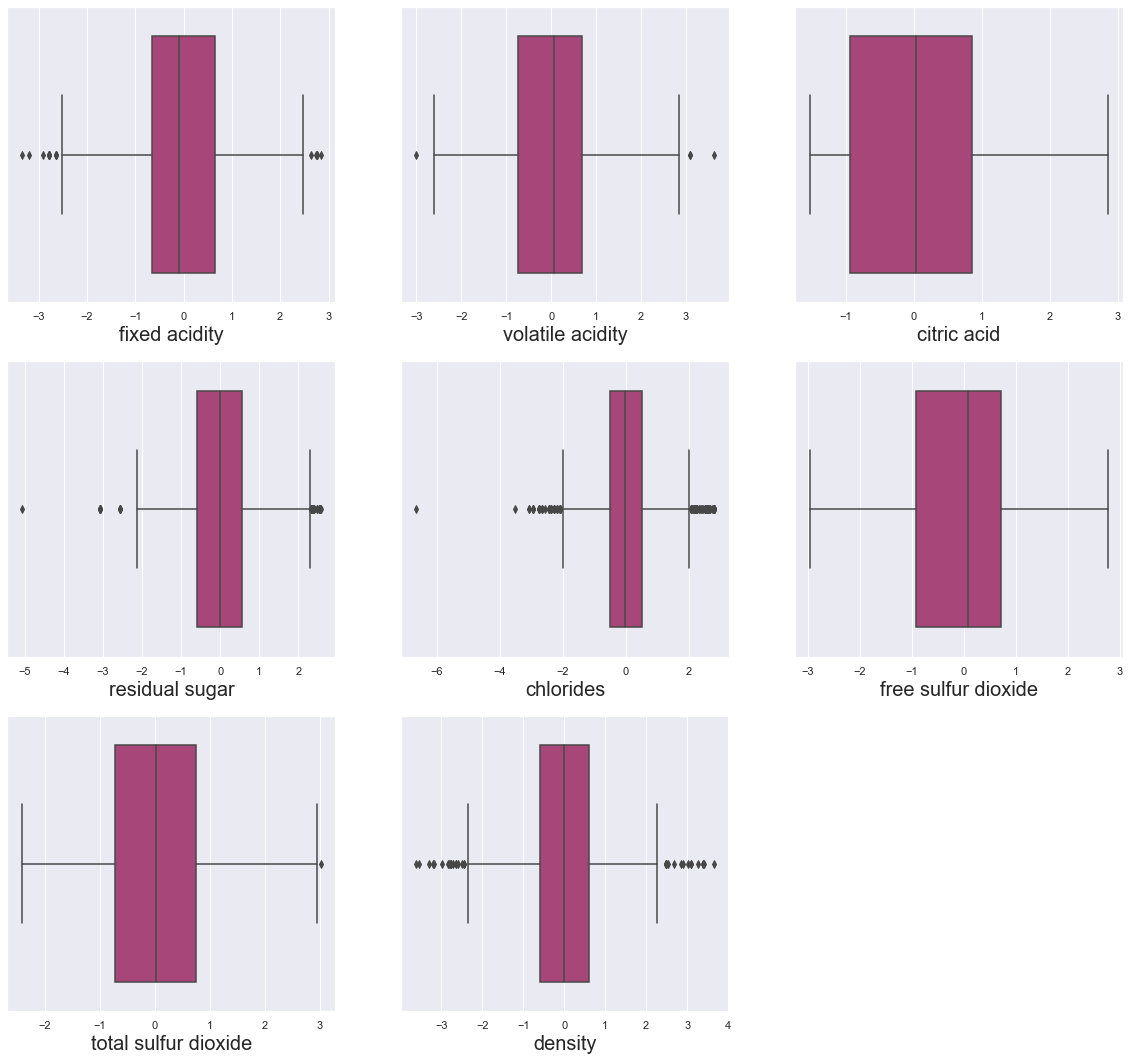

In [25]:
#Plotting bocplot after removing skeweness
plt.figure(figsize = (20,25), facecolor ='white')
plotnumber=1

for column in X_trans:
    if plotnumber<9: #there are 9 columns in dataset
        ax = plt.subplot(4,3,plotnumber)
        sns.boxplot(X_trans[column], palette = 'magma')
        plt.xlabel(column,fontsize=20)
        #plt.ylabel(Outcome,fontsize=20)
    plotnumber+=1
plt.show()   

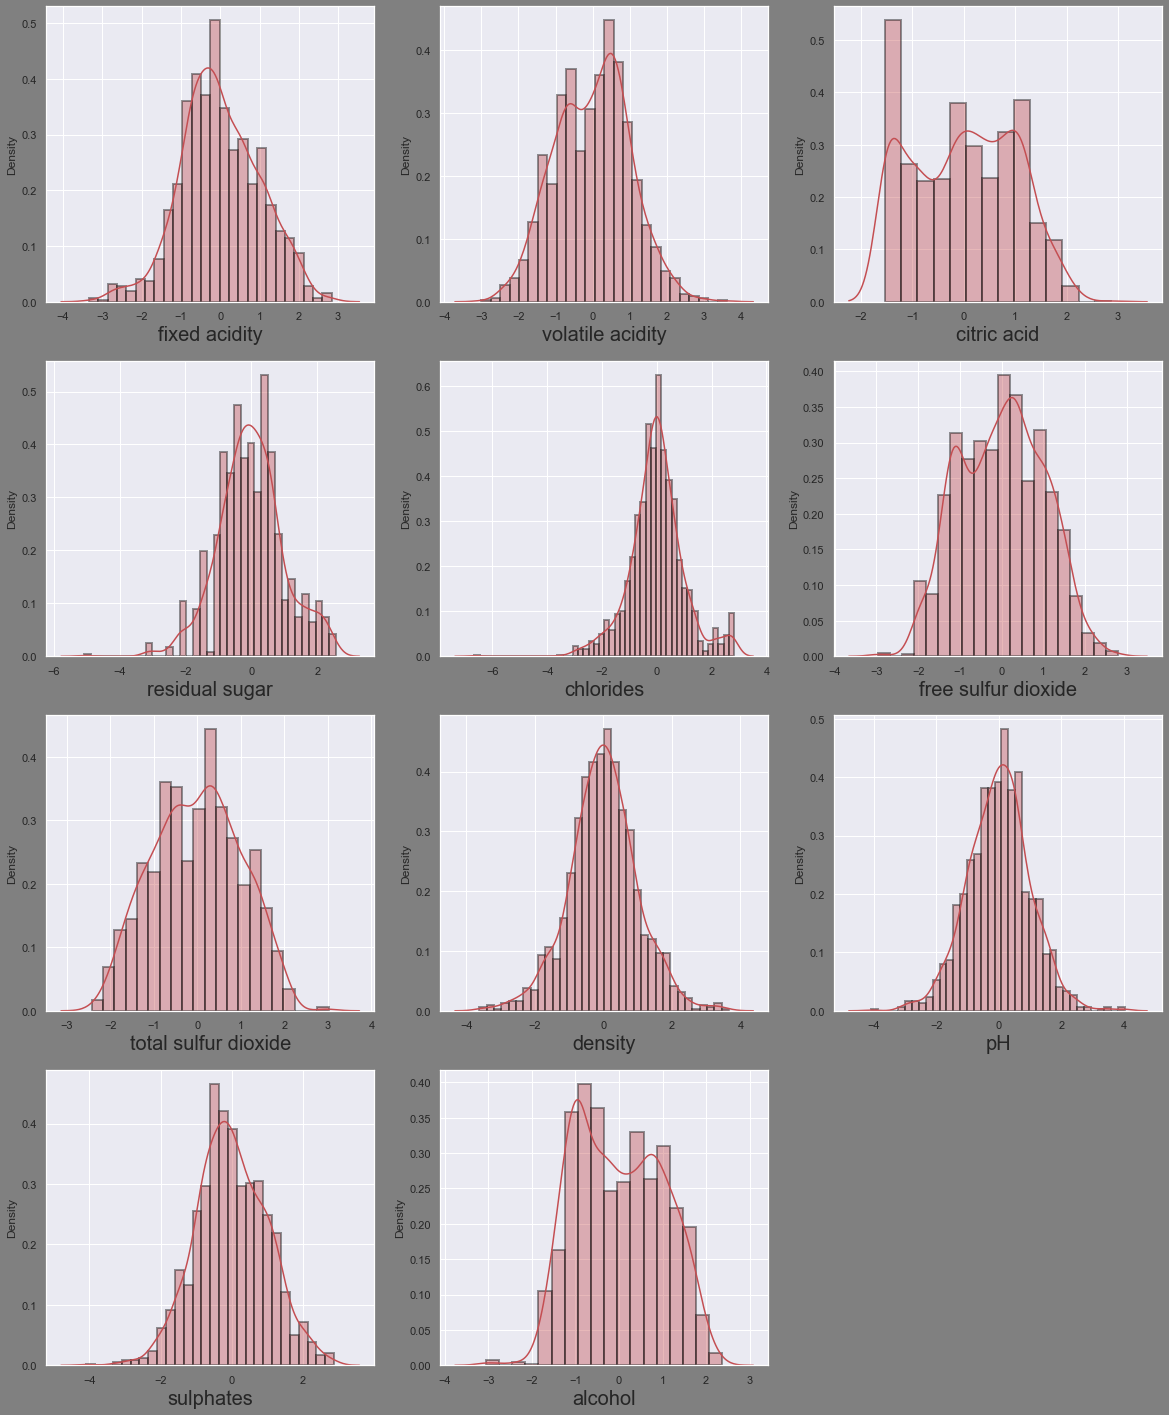

In [26]:
#how data is distributed after removing skewness
plt.figure(figsize = (20,25), facecolor ='grey')
plotnumber=1

for column in X_trans:
    if plotnumber<=12: #there are 9 columns in dataset
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(X_trans[column], color = 'r',
                    hist_kws=dict(edgecolor="black", linewidth=2))
        plt.xlabel(column,fontsize=20)
        #plt.ylabel(Outcome,fontsize=20)
    plotnumber+=1
plt.show() 

### Using KSelect Best features to choose Features

In [27]:
# Selecting k as 7
best_features = SelectKBest(score_func=f_classif, k=7)
fit = best_features.fit(X_trans,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X_trans.columns)

#concatenate dataframes
feature_scores = pd.concat([df_columns,df_scores], axis=1)
feature_scores.columns = ['Feature_Name', 'Score']

#Sorting in Descending order
print(feature_scores.nlargest(7,'Score'))

            Feature_Name       Score
10               alcohol  100.435467
1       volatile acidity   52.699583
9              sulphates   38.660796
6   total sulfur dioxide   22.700989
2            citric acid   16.121904
4              chlorides   14.910340
7                density   13.046344


In [28]:
X_new = X.drop(columns = ['pH','fixed acidity', 'residual sugar'], axis = 1)

In [29]:
X_new

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,0.700,0.00,0.076,11.0,34.0,0.99780,0.56,9.4
1,0.880,0.00,0.098,25.0,67.0,0.99680,0.68,9.8
2,0.760,0.04,0.092,15.0,54.0,0.99700,0.65,9.8
3,0.280,0.56,0.075,17.0,60.0,0.99800,0.58,9.8
5,0.660,0.00,0.075,13.0,40.0,0.99780,0.56,9.4
...,...,...,...,...,...,...,...,...
1593,0.620,0.08,0.068,28.0,38.0,0.99651,0.82,9.5
1594,0.600,0.08,0.090,32.0,44.0,0.99490,0.58,10.5
1595,0.550,0.10,0.062,39.0,51.0,0.99512,0.76,11.2
1597,0.645,0.12,0.075,32.0,44.0,0.99547,0.71,10.2


<AxesSubplot:xlabel='quality', ylabel='count'>

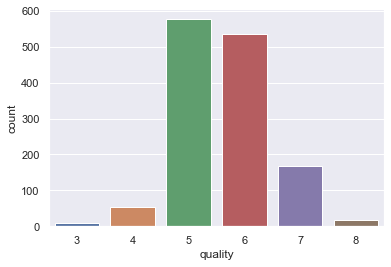

In [30]:
#Univariate Analysis
#there are 6 clases for quality from 3 to 8
sns.countplot(y)

In [31]:
#Creating a new class of "good"(above 6) and "not good" (below6)

y.replace(to_replace = [1,2,3,4,5,6], value = "Not Good", inplace = True)
y.replace(to_replace = [7,8,9,10], value = "Good", inplace = True)

In [32]:
#Replacing "good " : 0 and "not good" : 1
y.replace({"Not Good" : 0, "Good" : 1}, inplace = True)

In [33]:
y.value_counts()

0    1175
1     184
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

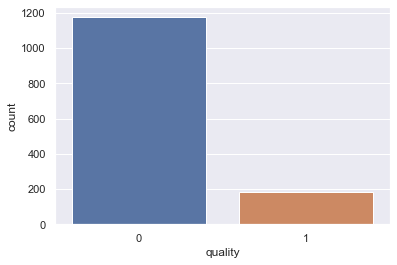

In [34]:
#Univariate plot
#Analysing class counts
#we can clearly see there is a huge imbalance in classes
sns.countplot(y)

### Using SMOTE for oversampling of Class

In [35]:
#instantiating and fitting Smote
sm = SMOTE()
X_smote, y_smote = sm.fit_resample(X,y)

In [36]:
#print Count of class before oversampling and after oversampling
print('Before SMOTE : ',Counter(y))
print('After SMOTE : ',Counter(y_smote))

Before SMOTE :  Counter({0: 1175, 1: 184})
After SMOTE :  Counter({0: 1175, 1: 1175})


<AxesSubplot:xlabel='quality', ylabel='count'>

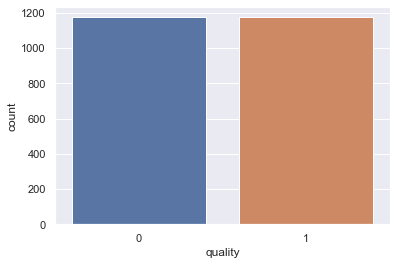

In [37]:
#Univariate Analysis
#Plotting the balanced class
sns.countplot(y_smote)

In [38]:
print("Shape of the Dataset after using SMOTE for Oversampling :",X.shape)

Shape of the Dataset after using SMOTE for Oversampling : (1359, 11)


In [39]:
#Performing Scaling on the X features
Scaler = StandardScaler()
X_scaled = Scaler.fit_transform(X_smote)

### Train - Test - Split

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_smote,test_size = 0.25)

### Adaptive boost

In [41]:
#Instantiating model and fitting model

adaboost = AdaBoostClassifier()
adaboost.fit(X_train,y_train)

AdaBoostClassifier()

In [42]:
# Performing Evaluation metrics for our model
predada=adaboost.predict(X_test)
print('Accuracy Score for AdaBoost is :',round(accuracy_score(y_test,predada),4)*100,'% \n')
print('Confusion Matrix of AdaBoost : \n',confusion_matrix(y_test,predada), '\n')
print('Classification AdaBoost : \n',classification_report(y_test,predada))

Accuracy Score for AdaBoost is : 86.39 % 

Confusion Matrix of AdaBoost : 
 [[221  50]
 [ 30 287]] 

Classification AdaBoost : 
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       271
           1       0.85      0.91      0.88       317

    accuracy                           0.86       588
   macro avg       0.87      0.86      0.86       588
weighted avg       0.86      0.86      0.86       588



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

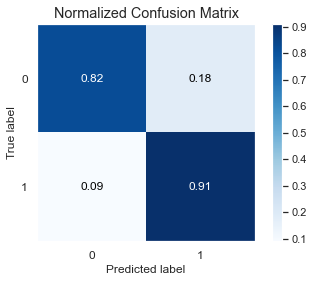

In [43]:
#Plotting Confusion Matrix Adaptive Boost model
skplt.metrics.plot_confusion_matrix(y_test, predada, normalize=True)

In [44]:
#Getting Cross Val Score for the model
score = cross_val_score(adaboost,X_scaled,y_smote, cv = 15)
print("Cross validation score is :", round(score.mean(),3)*100,'%')

Cross validation score is : 85.8 %


### Xtreme Gradient Boost

In [45]:
#Instantiating XGB
xgb = XGBClassifier(objective = 'binary:logistic', eval_metric='mlogloss')

In [46]:
#Fitting out training dataset
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [47]:
# Performing Evaluation metrics for our model

predxgb=xgb.predict(X_test)
print('Accuracy Score for Xtreme Gradient Boost is :',round(accuracy_score(y_test,predxgb),4)*100,'% \n')
print('Confusion Matrix of Xtreme Gradient Boost : \n',confusion_matrix(y_test,predxgb), '\n')
print('Classification Xtreme Gradient Boost : \n',classification_report(y_test,predxgb))

Accuracy Score for Xtreme Gradient Boost is : 93.03 % 

Confusion Matrix of Xtreme Gradient Boost : 
 [[242  29]
 [ 12 305]] 

Classification Xtreme Gradient Boost : 
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       271
           1       0.91      0.96      0.94       317

    accuracy                           0.93       588
   macro avg       0.93      0.93      0.93       588
weighted avg       0.93      0.93      0.93       588



In [48]:
# CV SCore for XGB
score = cross_val_score(xgb,X_scaled,y_smote, cv = 15)
print("Cross validation score is :", round(score.mean(),3)*100,'%')

Cross validation score is : 92.30000000000001 %


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

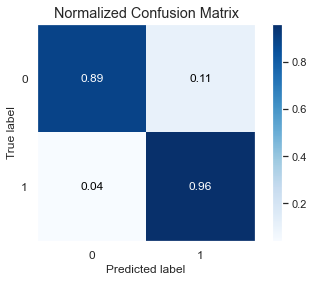

In [49]:
#Plotting Confusion Matrix Decision Tree model
skplt.metrics.plot_confusion_matrix(y_test, predxgb, normalize=True)

### Decision Tree

In [50]:
#Instantiating Decision Tree model and training it
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
# Performing Evaluation metrics for our model
preddt=DT.predict(X_test)
print('Accuracy Score for Decision Treee is :',round(accuracy_score(y_test,preddt),4)*100,'% \n')
print('Confusion Matrix of Decision Tree: \n',confusion_matrix(y_test,preddt), '\n')
print('Classification Decision Tree: \n',classification_report(y_test,preddt))

Accuracy Score for Decision Treee is : 87.24 % 

Confusion Matrix of Decision Tree: 
 [[230  41]
 [ 34 283]] 

Classification Decision Tree: 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       271
           1       0.87      0.89      0.88       317

    accuracy                           0.87       588
   macro avg       0.87      0.87      0.87       588
weighted avg       0.87      0.87      0.87       588



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

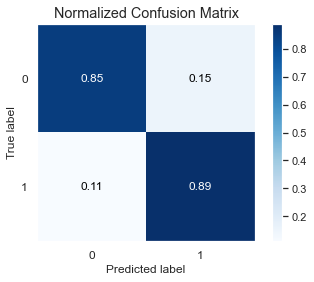

In [52]:
#Plotting Confusion Matrix Decision Tree model
skplt.metrics.plot_confusion_matrix(y_test, preddt, normalize=True)

In [53]:
# Cross Validation Score for our Decision Tree Model
score = cross_val_score(DT,X_scaled,y_smote, cv = 15)
print("Cross validation score is :", round(score.mean(),3)*100,'%')

Cross validation score is : 85.2 %


### Random Forest Classifier

In [54]:
#Model instantiating and training it
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [55]:
# Performing Evaluation metrics for our model
predrf=RF.predict(X_test)
print('Accuracy Score for Random Forest Classifier is :',round(accuracy_score(y_test,predrf),4)*100,'% \n')
print('Confusion Matrix of Random Forest Classifier : \n',confusion_matrix(y_test,predrf), '\n')
print('Classification Random Forest Classifier : \n',classification_report(y_test,predrf))

Accuracy Score for Random Forest Classifier is : 93.2 % 

Confusion Matrix of Random Forest Classifier : 
 [[241  30]
 [ 10 307]] 

Classification Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       271
           1       0.91      0.97      0.94       317

    accuracy                           0.93       588
   macro avg       0.94      0.93      0.93       588
weighted avg       0.93      0.93      0.93       588



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

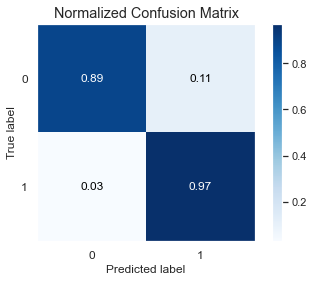

In [56]:
#Plotting Confusion Matrix Decision Tree model
skplt.metrics.plot_confusion_matrix(y_test, predrf, normalize=True)

In [57]:
#CV Score for our Random forest classifier model
score = cross_val_score(RF,X_scaled,y_smote, cv = 15)
print("Cross validation score is :", round(score.mean(),3)*100,'%')

Cross validation score is : 91.7 %


In [58]:
#Finding Random state using LogisticRegression
maxAccu=0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y_smote,test_size=0.25,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on random_state",maxRS)

Best accuracy is 0.8571428571428571 on random_state 188


In [59]:
# Performing Evaluation metrics for our model
predlr=LR.predict(X_test)
print('Accuracy Score for Random Forest Classifier is :',round(accuracy_score(y_test,predlr),4)*100,'% \n')
print('Confusion Matrix of Random Forest Classifier : \n',confusion_matrix(y_test,predlr), '\n')
print('Classification Random Forest Classifier : \n',classification_report(y_test,predlr))

Accuracy Score for Random Forest Classifier is : 51.53 % 

Confusion Matrix of Random Forest Classifier : 
 [[134 158]
 [127 169]] 

Classification Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.51      0.46      0.48       292
           1       0.52      0.57      0.54       296

    accuracy                           0.52       588
   macro avg       0.52      0.51      0.51       588
weighted avg       0.52      0.52      0.51       588



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

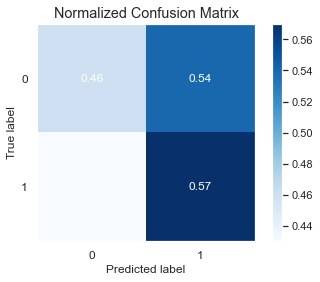

In [60]:
#Plotting Confusion Matrix of Logistic Regression model
skplt.metrics.plot_confusion_matrix(y_test, predlr, normalize=True)

In [61]:
#CV Score for Logistic Regression
score = cross_val_score(LR,X_scaled,y_smote, cv = 15)
print("Cross validation score is :", round(score.mean(),3)*100,'%')

Cross validation score is : 82.0 %


In [62]:
#Printing cross_val_scores of all models used so far

CVscore_adaboost = cross_val_score(adaboost,X_scaled,y_smote, cv = 15)
print("Cross validation score is :", round(CVscore_adaboost.mean(),3)*100,'%')

CVscore_XGboost = cross_val_score(xgb,X_scaled,y_smote,cv = 15 )
print("Cross validation score of XG Boost is :", round(CVscore_XGboost.mean(),4)*100,'%')

CVscore_DT = cross_val_score(DT,X_scaled,y_smote,cv = 15 )
print("Cross validation score of Decision Tree :", round(CVscore_DT.mean(),4)*100,'%')

CVscore_RF = cross_val_score(RF,X_scaled,y_smote,cv = 15 )
print("Cross validation score Random Forest Classifier is :",round(CVscore_RF.mean(),4)*100,'%')

CVscore_LR = cross_val_score(LR,X_scaled,y_smote,cv = 15 )
print("Cross validation score Logistic Regression Classifier is :",round(CVscore_LR.mean(),4)*100,'%')

Cross validation score is : 85.8 %
Cross validation score of XG Boost is : 92.25 %
Cross validation score of Decision Tree : 86.0 %
Cross validation score Random Forest Classifier is : 91.36 %
Cross validation score Logistic Regression Classifier is : 82.04 %


In [63]:
#Creating a Dataframe to check difference between model accuracy and cross_val_score
data = {'Model Accuracy' : [0.828,0.913,0.858,0.896, 0.86],
                      'Cross-Val-Score': [0.859,0.921,0.859,0.911,0.813]}
                      
Model = pd.DataFrame(data,index = ['AdaBoost','XGBoost','Decision Tree','Random Forest','Logistic Regression'])
Model['ModelAcc - CVScore'] = Model['Model Accuracy'] - Model['Cross-Val-Score']
Model

,Model Accuracy,Cross-Val-Score,ModelAcc - CVScore
AdaBoost,0.828,0.859,-0.031
XGBoost,0.913,0.921,-0.008
Decision Tree,0.858,0.859,-0.001
Random Forest,0.896,0.911,-0.015
Logistic Regression,0.860,0.813,0.047


### ROC - AUC - CURVE

In [64]:
#printing roc-auc-score for all the models
print(roc_auc_score(y_test,predada))
print(roc_auc_score(y_test,predxgb))
print(roc_auc_score(y_test,predxgb))
print(roc_auc_score(y_test,preddt))
print(roc_auc_score(y_test,predrf))
print(roc_auc_score(y_test,predlr))

0.5114078119215105
0.5165447982228804
0.5165447982228804
0.5268650499814883
0.5318169196593854
0.5149250277674935


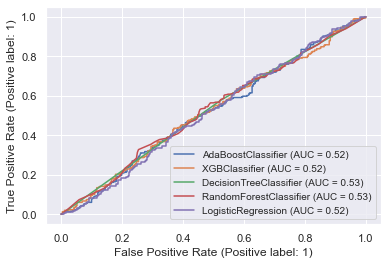

In [65]:
# Plotting ROC_Curve
disp = plot_roc_curve(adaboost,X_test,y_test)

plot_roc_curve(xgb ,X_test,y_test,ax=disp.ax_)   #ax_ - axes with confusion matrix

plot_roc_curve(DT,X_test,y_test, ax=disp.ax_)

plot_roc_curve(RF,X_test,y_test, ax=disp.ax_)

plot_roc_curve(LR,X_test,y_test, ax=disp.ax_)


plt.legend(prop={'size':10}, loc = 'best')


plt.show()

### Hyperparameter tuning with gridsearchCV

In [66]:
grid = {"penalty":[ 'l2', 'elasticnet', None],
        "random_state" : [86],
        "warm_start" : ['True', 'False'],
        "n_jobs" : [1, -1]
       }

In [67]:
gridsearch = GridSearchCV(LR,grid, cv = 5)

In [68]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'n_jobs': [1, -1],
                         'penalty': ['l2', 'elasticnet', None],
                         'random_state': [86],
                         'warm_start': ['True', 'False']})

In [69]:
gridsearch.best_params_

{'n_jobs': 1, 'penalty': 'l2', 'random_state': 86, 'warm_start': 'True'}

In [70]:
model = LogisticRegression(n_jobs = 1, random_state = 86, warm_start = True, penalty = 'l2')

In [71]:
model.fit(X_train,y_train)

LogisticRegression(n_jobs=1, random_state=86, warm_start=True)

In [72]:
# Performing Evaluation metrics for our model
predmodel=model.predict(X_test)
print('Accuracy Score for Random Forest Classifier is :',round(accuracy_score(y_test,predmodel),4)*100,'% \n')
print('Confusion Matrix of Random Forest Classifier : \n',confusion_matrix(y_test,predmodel), '\n')
print('Classification Random Forest Classifier : \n',classification_report(y_test,predmodel))

Accuracy Score for Random Forest Classifier is : 45.58 % 

Confusion Matrix of Random Forest Classifier : 
 [[137 155]
 [165 131]] 

Classification Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.45      0.47      0.46       292
           1       0.46      0.44      0.45       296

    accuracy                           0.46       588
   macro avg       0.46      0.46      0.46       588
weighted avg       0.46      0.46      0.46       588



# Hyperparameter Tuning of Decision Tree

In [73]:
# Instantiating grid_parameters
grid = {"criterion" : ['gini','entropy'],
       "splitter" : ['random','best'],
       "max_depth" : [1,2,3,4,5],
       "min_samples_split" : [1,2,3,4,5,6],
       "min_samples_leaf" : [1,2,3,4,5,6,7]}

In [78]:
#Instantiating Randomized SearchCV
DT_random = RandomizedSearchCV(estimator = DT, param_distributions = grid, n_iter = 100, cv = 3, verbose=2, random_state=42,refit=True)

In [79]:
#training our model with tuned hyperparameters
DT_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=1, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=1, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=1, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=4, splitter=random; total time=   0.0s
[CV] 

[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=6, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=6, min_samples_split=2, sp

[CV] END criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=4,

[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_sp

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6],
                                        'splitter': ['random', 'best']},
                   random_state=42, verbose=2)

In [81]:
#To check the best parameters to increase model Accuracy
DT_random.best_params_

{'splitter': 'best',
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_depth': 4,
 'criterion': 'gini'}

In [82]:
#Instantiating model with suggested best parameters by randomizedsearch cv
model1 = DecisionTreeClassifier(splitter = 'best',min_samples_split =6, min_samples_leaf = 2, max_depth = 4, criterion = 'gini' )

In [83]:
#Fitting out training set 
model1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=6)

In [84]:
# Performing Evaluation metrics for our model
predmodel1=model1.predict(X_test)
print('Accuracy Score for Decision Tree Classifier is :',round(accuracy_score(y_test,predmodel1),4)*100,'% \n')
print('Confusion Matrix of Decision Tree Classifier : \n',confusion_matrix(y_test,predmodel1), '\n')
print('Classification Random Decision Tree Classifier : \n',classification_report(y_test,predmodel1))

Accuracy Score for Decision Tree Classifier is : 48.47 % 

Confusion Matrix of Decision Tree Classifier : 
 [[126 166]
 [137 159]] 

Classification Random Decision Tree Classifier : 
               precision    recall  f1-score   support

           0       0.48      0.43      0.45       292
           1       0.49      0.54      0.51       296

    accuracy                           0.48       588
   macro avg       0.48      0.48      0.48       588
weighted avg       0.48      0.48      0.48       588



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

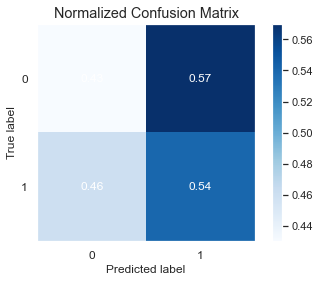

In [85]:
#Plotting Confusion Matrix of Logistic Regression model
skplt.metrics.plot_confusion_matrix(y_test, predmodel1, normalize=True)

### Conclusion:
From our above model implementations. We find out that our Decision Tree is giving us highest precision,recall, f1. Over all the models according to ROC AUC Curve. Hence, we can move forward with Decision Tree Classifier. Our AUC_ROC_Score is low due to small amount of data provided. Our models our underfit.

### Saving our final model

In [86]:
joblib.dump(model1,"RedWineQualityAnalysis.pkl")

['RedWineQualityAnalysis.pkl']

### Loading our Saved model

In [87]:
model = joblib.load("RedWineQualityAnalysis.pkl")

In [88]:
#predicting test data using loaded model and saving the results in a dataframe
prediction = model.predict(x_test)
prediction = pd.DataFrame(prediction)
prediction

,0
0,1
1,0
2,0
3,0
4,0
...,...
583,1
584,1
585,0
586,0


In [89]:
#Converting the saved file into .csv format
prediction.to_csv('Results.csv',index = False)